In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150


In [32]:
a_0,a_T, T = 1e-4, 0.02, 1000
b = np.linspace(a_0, a_T, T)
a = 1-b
bar_a = np.cumprod(a)


In [33]:
# Cosine schedule
b_0, b_T, T = 0.001, 0.1, 200

def cosine_interp(T, b_T, b_0):
    t = np.arange(T)
    out = b_T + 0.5*(b_0-b_T)*(1+np.cos((t/T)*np.pi))
    return out

b = cosine_interp(T, b_T, b_0)
a = 1-b
bar_a = np.cumprod(a)

In [49]:
# Linear schedule
b_0, b_T, T = 0.0001, 0.2, 200
b = np.linspace(b_0, b_T, T) 
a = 1-b
bar_a = np.cumprod(a)

In [52]:
x_t_term = np.cumprod((1 / np.sqrt(a))[::-1])
# eps_term = np.cumprod((1 - np.sqrt(a)) / np.sqrt(a*(1-bar_a)))
eps_term = (1 - np.sqrt(a)) / np.sqrt(a*(1-bar_a))

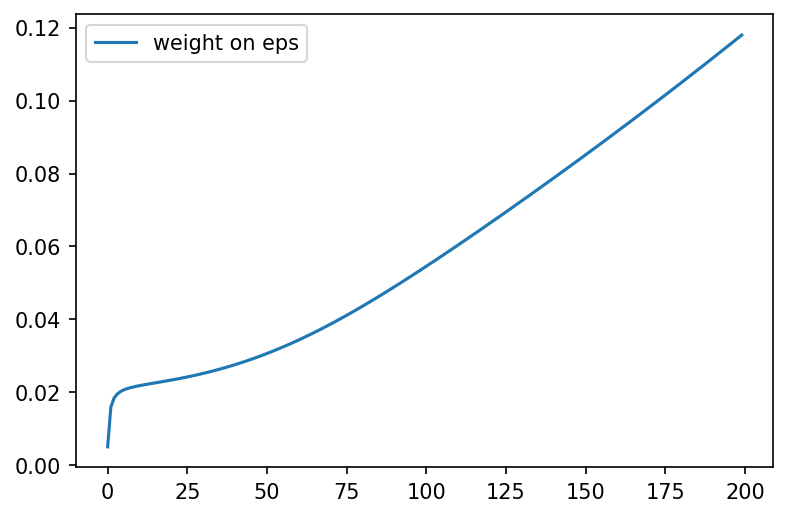

In [56]:
# plt.plot(x_t_term, label='weight on xt')
plt.plot(eps_term, label='weight on eps')
plt.legend()

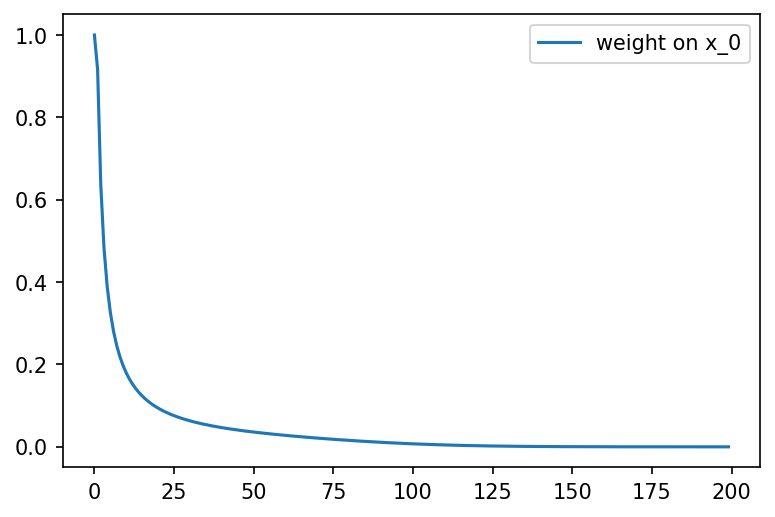

In [58]:

plt.plot((np.sqrt(bar_a) * b)/(1 - bar_a), label='weight on x_0')
plt.legend()

In [59]:
import torch

In [65]:
torch.normal(torch.Tensor([2.0]), torch.Tensor([0.0]))


tensor([2.])

In [ ]:
# plt.plot(bar_a)
# plt.xlabel("T")
# plt.ylabel("bar alpha_t")

In [17]:
term_on_x0 = np.sqrt(bar_a[:-1])*b[1:]/(1-bar_a[1:])
term_on_xt = np.sqrt(a[1:])*(1-bar_a[:-1])/(1-bar_a[1:])

In [18]:
weight_on_xT = np.cumprod(term_on_xt[::-1])[::-1]

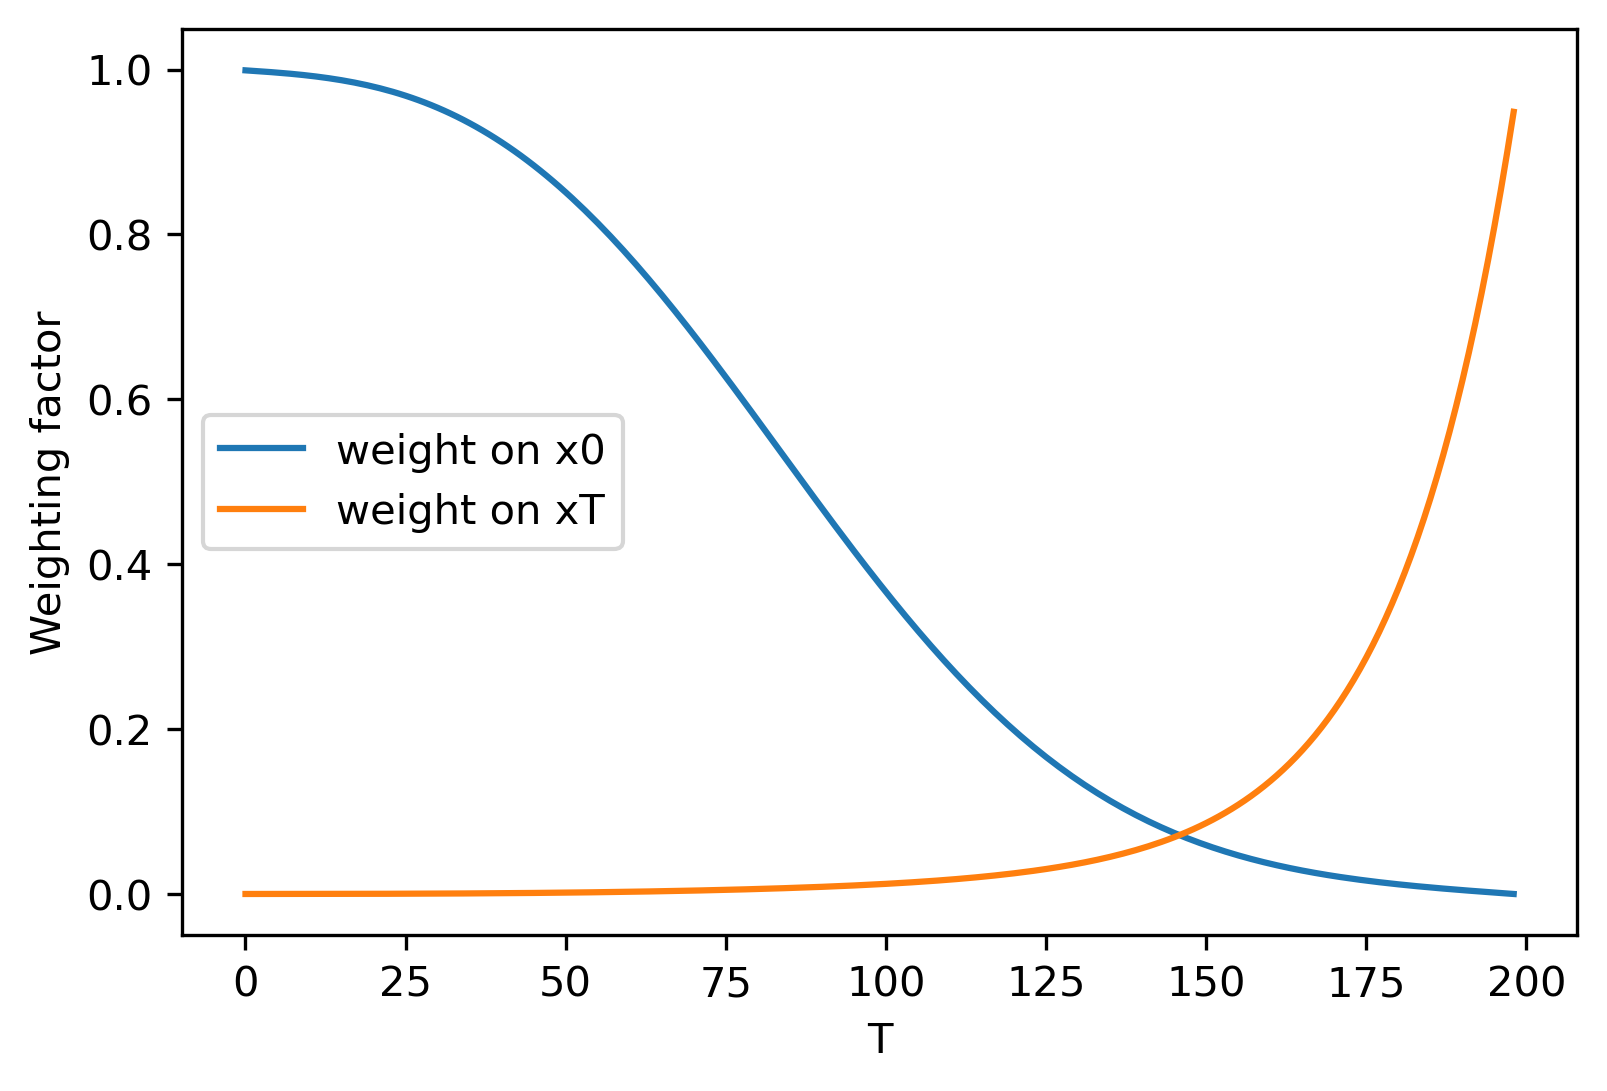

In [19]:
weight_on_x0 = [0]
for t in range(T-2,0,-1):
    weight_on_x0.append(term_on_xt[t]*weight_on_x0[-1] + term_on_x0[t])
weight_on_x0 = np.array(weight_on_x0[::-1])
plt.plot(weight_on_x0, label='weight on x0')
plt.plot(weight_on_xT, label="weight on xT")
plt.xlabel("T")
plt.ylabel("Weighting factor")
plt.legend()
plt.show()